In [9]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision.io import read_image
from torchvision import transforms
from torchvision.utils import make_grid
from common.utils import crop
from unet.model import UNet
from torch.utils.data import DataLoader, Dataset, Subset
import matplotlib.pyplot as plt
import numpy as np
from common.dataset import USImagesDataset
import yaml
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
torch.manual_seed(0)

%matplotlib inline

def show_tensor_images(image_tensor, num_images=5, size=(1, 112, 112)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in a uniform grid.
    '''
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
#     plt.savefig(f"unet-results/unet_epoch-{epoch}-examples.pdf", bbox_inches='tight')
    plt.show()

In [6]:
def read_config(path):
    with open(path, "r") as stream:
        try:
            config = yaml.safe_load(stream)
            config = {**config["unet"], **config["common"]}
            if config["criterion"] == "bcelosswithlogits":
                config["criterion"] = nn.BCEWithLogitsLoss()
            else:
                raise f"Invalid criterion {config['criterion']}"

            return config
        except yaml.YAMLError as exc:
            print(exc)
            exit(-1)

            
def summary(epoch, loss, real, pred, mask, label_dim, mask_target_shape):
    print(f"[EPOCH {epoch+1}/{n_epochs}]:   U-Net loss: {loss[-1]:.4f}")
    
    show_tensor_images((real + 1) / 2, size=(label_dim, mask_target_shape, mask_target_shape))
    show_tensor_images((mask + 1) / 2, size=(label_dim, mask_target_shape, mask_target_shape))
    show_tensor_images(torch.sigmoid(pred), size=(label_dim, mask_target_shape, mask_target_shape))
    plt.plot(range(len(loss)), loss, label="U-Net Loss")
    plt.legend(loc="best")
    plt.savefig(f"unet-results/unet_epoch-{epoch}.pdf", bbox_inches='tight')
    plt.show()

In [7]:
config = read_config("config.yaml")

image_path = "/home/student/synthetic-us-images/camus-images/image"
mask_path = "/home/student/synthetic-us-images/camus-images/mask"
mask_target_shape = 53
batch_size = 8
input_dim = config["input_dim"]
label_dim = config["label_dim"]
lr = 1e-4
device = config["device"]
n_epochs = 80
epoch_log_step = 10

initial_shape = 200

criterion = nn.BCELoss()

In [11]:
transform = [
    transforms.ToTensor(),
]
dataset = USImagesDataset(image_path, mask_path,
        transforms.Compose(transform+[transforms.Resize((initial_shape, initial_shape))]), 
        transforms.Compose(transform+[transforms.Resize((mask_target_shape, mask_target_shape))]))


train_idx, test_idx = train_test_split(list(range(len(dataset))), test_size=0.2)
train_set = Subset(dataset, train_idx)
test_set = Subset(dataset, test_idx)


trainloader = torch.utils.data.DataLoader(train_set, batch_size=10)
testloader = torch.utils.data.DataLoader(test_set, batch_size=10)

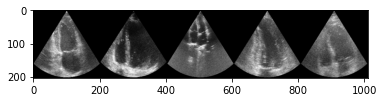

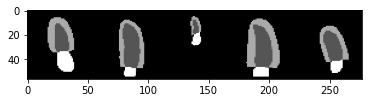

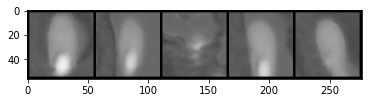


[EPOCH 1/80] | Train loss: 0.0770
[EPOCH 1/80] | Test loss: 0.1655


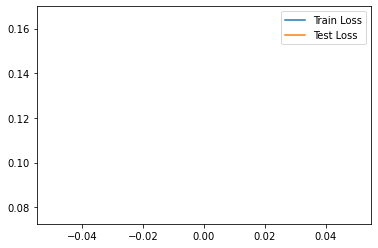


[EPOCH 2/80] | Train loss: 0.0654
[EPOCH 2/80] | Test loss: 0.1222


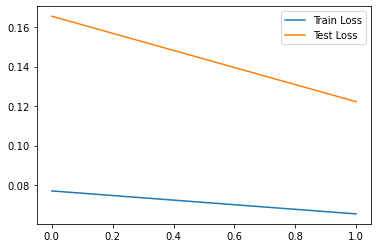


[EPOCH 3/80] | Train loss: 0.0606
[EPOCH 3/80] | Test loss: 0.1056


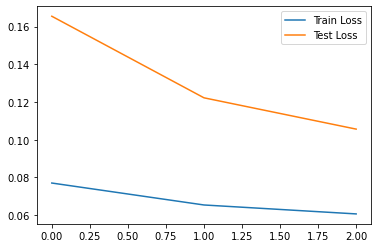


[EPOCH 4/80] | Train loss: 0.0569
[EPOCH 4/80] | Test loss: 0.0765


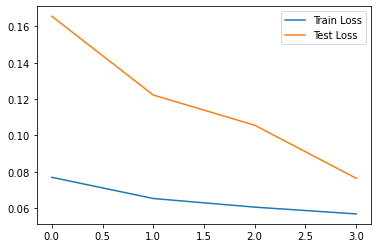


[EPOCH 5/80] | Train loss: 0.0535
[EPOCH 5/80] | Test loss: 0.0755


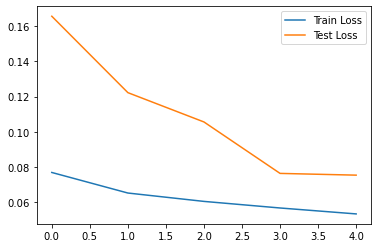


[EPOCH 6/80] | Train loss: 0.0505
[EPOCH 6/80] | Test loss: 0.0710


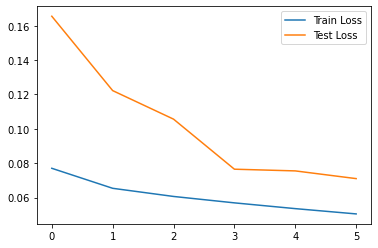


[EPOCH 7/80] | Train loss: 0.0476
[EPOCH 7/80] | Test loss: 0.0740


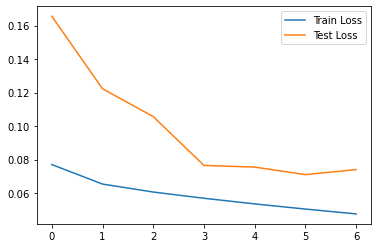


[EPOCH 8/80] | Train loss: 0.0451
[EPOCH 8/80] | Test loss: 0.0726


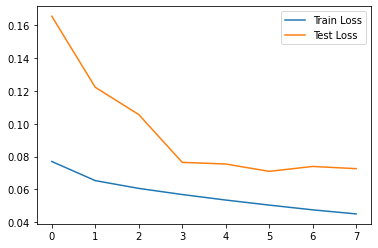


[EPOCH 9/80] | Train loss: 0.0429
[EPOCH 9/80] | Test loss: 0.0689


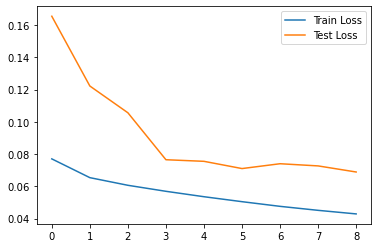


[EPOCH 10/80] | Train loss: 0.0410
[EPOCH 10/80] | Test loss: 0.0588


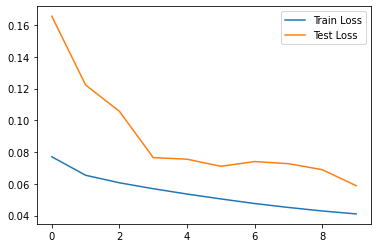

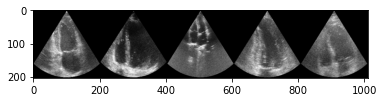

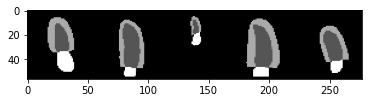

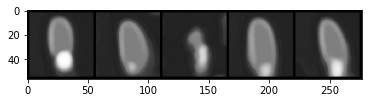


[EPOCH 11/80] | Train loss: 0.0394
[EPOCH 11/80] | Test loss: 0.0544


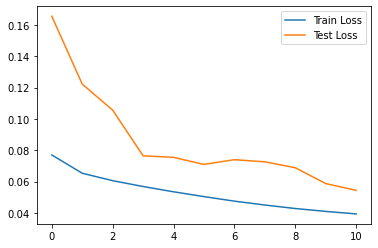


[EPOCH 12/80] | Train loss: 0.0379
[EPOCH 12/80] | Test loss: 0.0519


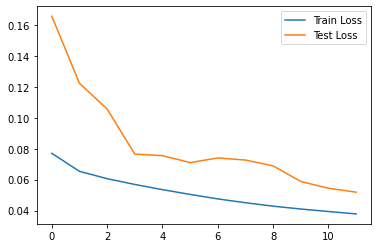


[EPOCH 13/80] | Train loss: 0.0366
[EPOCH 13/80] | Test loss: 0.0519


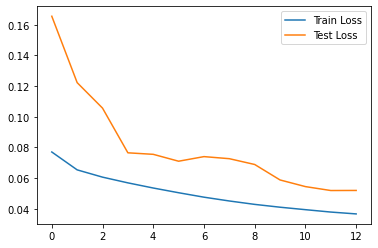


[EPOCH 14/80] | Train loss: 0.0355
[EPOCH 14/80] | Test loss: 0.0519


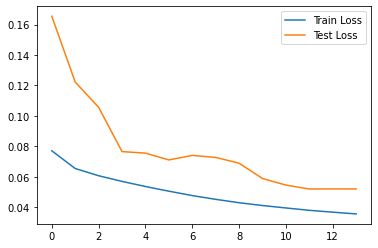


[EPOCH 15/80] | Train loss: 0.0345
[EPOCH 15/80] | Test loss: 0.0524


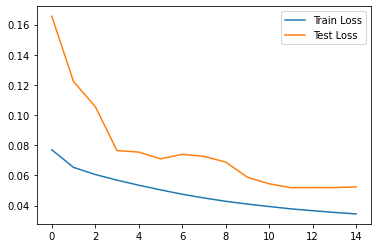


[EPOCH 16/80] | Train loss: 0.0336
[EPOCH 16/80] | Test loss: 0.0537


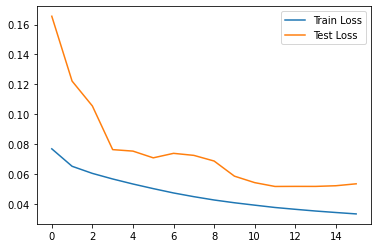


[EPOCH 17/80] | Train loss: 0.0328
[EPOCH 17/80] | Test loss: 0.0542


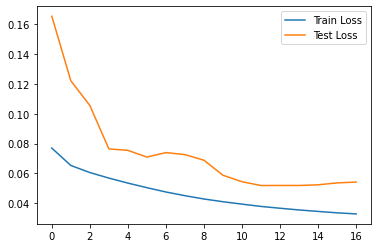


[EPOCH 18/80] | Train loss: 0.0320
[EPOCH 18/80] | Test loss: 0.0546


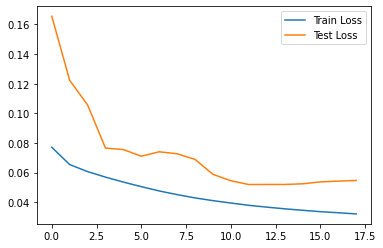


[EPOCH 19/80] | Train loss: 0.0315
[EPOCH 19/80] | Test loss: 0.0546


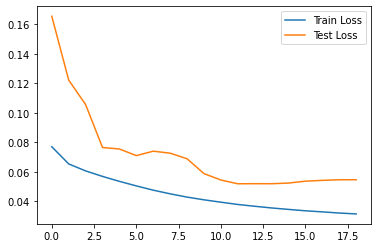


[EPOCH 20/80] | Train loss: 0.0309
[EPOCH 20/80] | Test loss: 0.0572


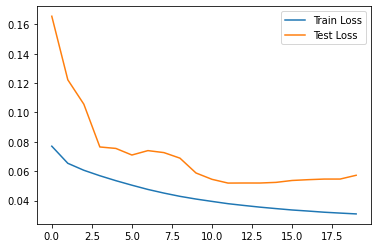

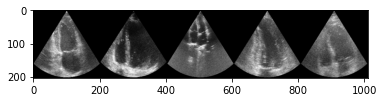

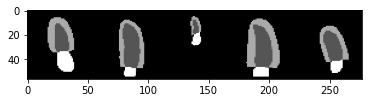

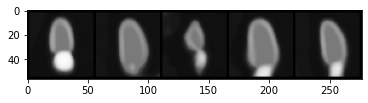


[EPOCH 21/80] | Train loss: 0.0304
[EPOCH 21/80] | Test loss: 0.0546


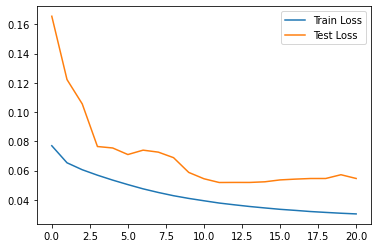


[EPOCH 22/80] | Train loss: 0.0301
[EPOCH 22/80] | Test loss: 0.0581


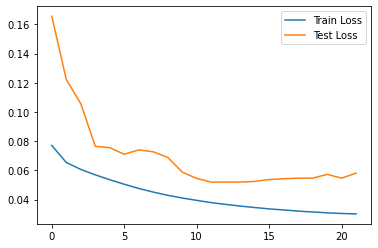


[EPOCH 23/80] | Train loss: 0.0294
[EPOCH 23/80] | Test loss: 0.0554


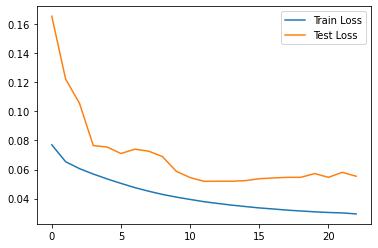


[EPOCH 24/80] | Train loss: 0.0291
[EPOCH 24/80] | Test loss: 0.0581


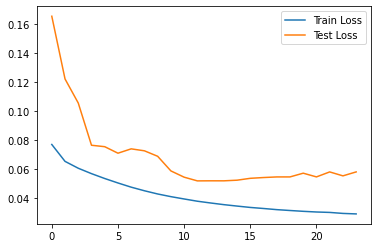


[EPOCH 25/80] | Train loss: 0.0286
[EPOCH 25/80] | Test loss: 0.0582


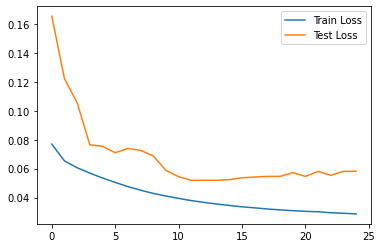


[EPOCH 26/80] | Train loss: 0.0284
[EPOCH 26/80] | Test loss: 0.0557


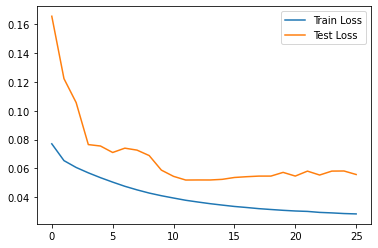


[EPOCH 27/80] | Train loss: 0.0281
[EPOCH 27/80] | Test loss: 0.0559


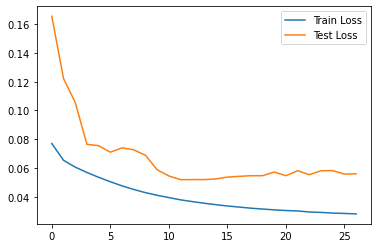


[EPOCH 28/80] | Train loss: 0.0277
[EPOCH 28/80] | Test loss: 0.0525


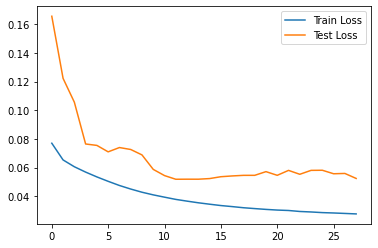


[EPOCH 29/80] | Train loss: 0.0274
[EPOCH 29/80] | Test loss: 0.0554


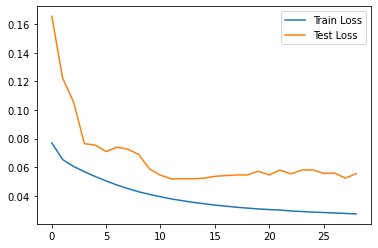


[EPOCH 30/80] | Train loss: 0.0270
[EPOCH 30/80] | Test loss: 0.0538


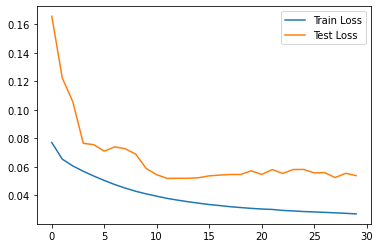

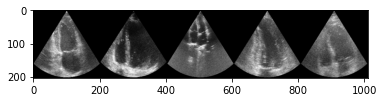

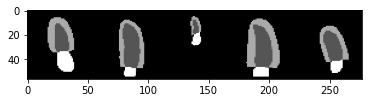

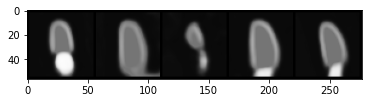


[EPOCH 31/80] | Train loss: 0.0269
[EPOCH 31/80] | Test loss: 0.0559


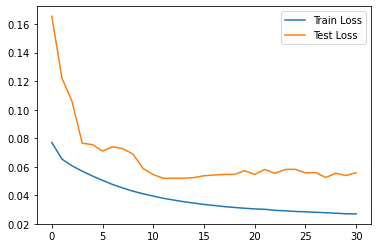


[EPOCH 32/80] | Train loss: 0.0266
[EPOCH 32/80] | Test loss: 0.0624


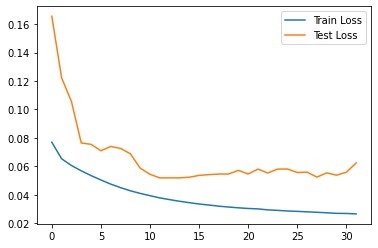


[EPOCH 33/80] | Train loss: 0.0264
[EPOCH 33/80] | Test loss: 0.0598


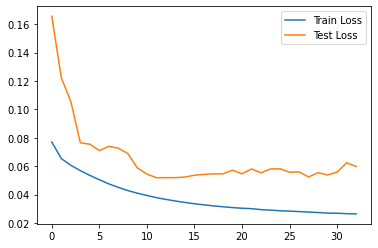


[EPOCH 34/80] | Train loss: 0.0263
[EPOCH 34/80] | Test loss: 0.0587


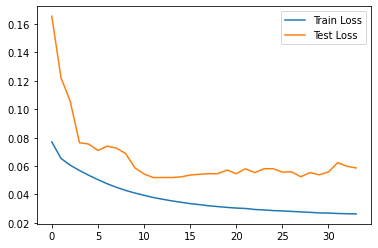


[EPOCH 35/80] | Train loss: 0.0260
[EPOCH 35/80] | Test loss: 0.0601


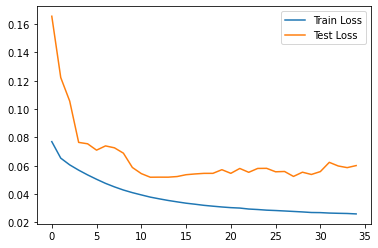


[EPOCH 36/80] | Train loss: 0.0257
[EPOCH 36/80] | Test loss: 0.0563


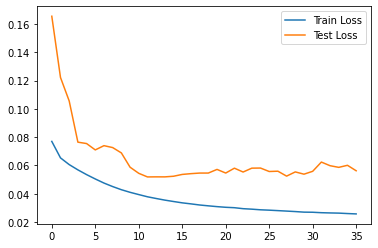


[EPOCH 37/80] | Train loss: 0.0256
[EPOCH 37/80] | Test loss: 0.0551


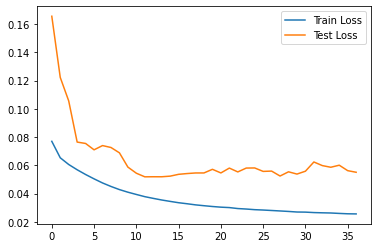


[EPOCH 38/80] | Train loss: 0.0256
[EPOCH 38/80] | Test loss: 0.0560


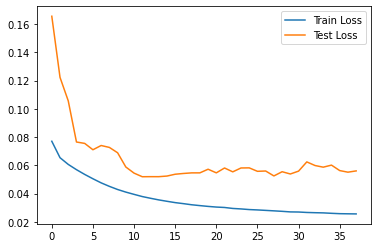


[EPOCH 39/80] | Train loss: 0.0255
[EPOCH 39/80] | Test loss: 0.0553


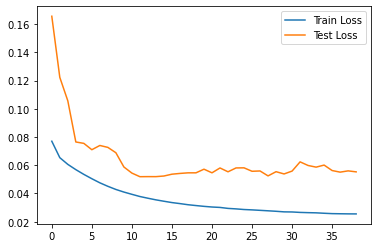


[EPOCH 40/80] | Train loss: 0.0253
[EPOCH 40/80] | Test loss: 0.0571


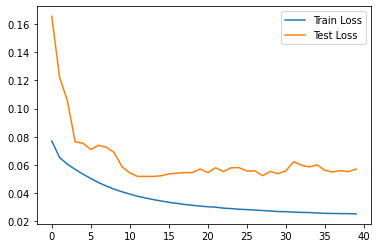

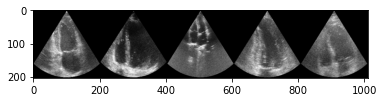

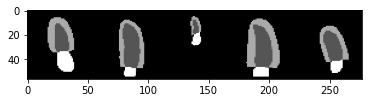

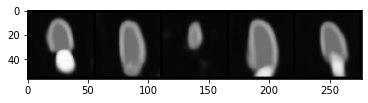


[EPOCH 41/80] | Train loss: 0.0251
[EPOCH 41/80] | Test loss: 0.0547


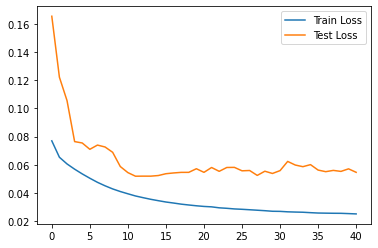


[EPOCH 42/80] | Train loss: 0.0249
[EPOCH 42/80] | Test loss: 0.0562


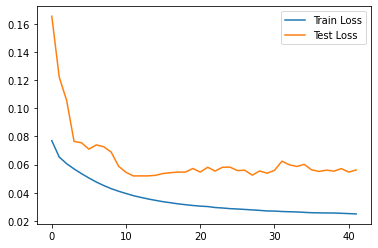


[EPOCH 43/80] | Train loss: 0.0249
[EPOCH 43/80] | Test loss: 0.0611


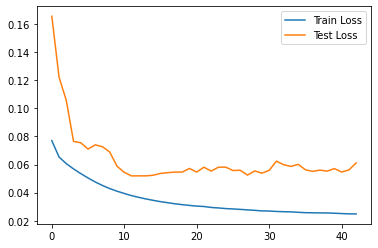


[EPOCH 44/80] | Train loss: 0.0247
[EPOCH 44/80] | Test loss: 0.0579


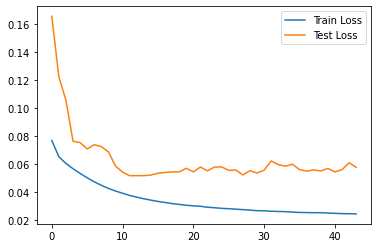


[EPOCH 45/80] | Train loss: 0.0248
[EPOCH 45/80] | Test loss: 0.0585


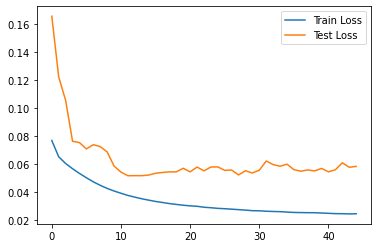


[EPOCH 46/80] | Train loss: 0.0247
[EPOCH 46/80] | Test loss: 0.0633


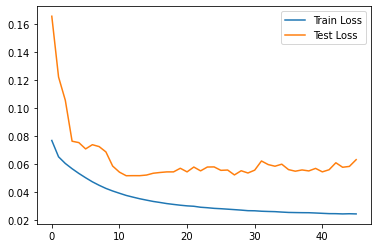


[EPOCH 47/80] | Train loss: 0.0245
[EPOCH 47/80] | Test loss: 0.0614


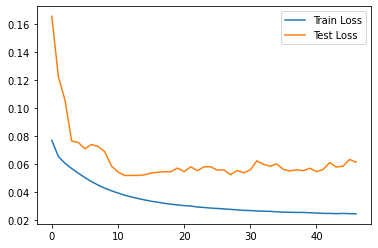


[EPOCH 48/80] | Train loss: 0.0245
[EPOCH 48/80] | Test loss: 0.0625


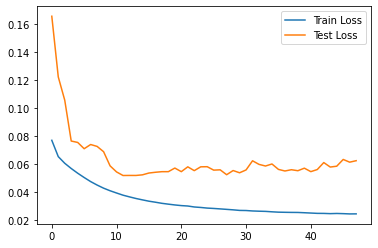


[EPOCH 49/80] | Train loss: 0.0244
[EPOCH 49/80] | Test loss: 0.0612


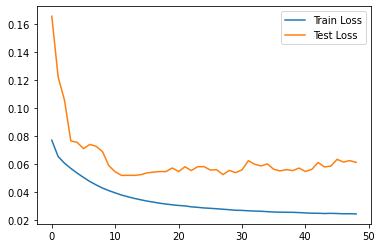


[EPOCH 50/80] | Train loss: 0.0246
[EPOCH 50/80] | Test loss: 0.0597


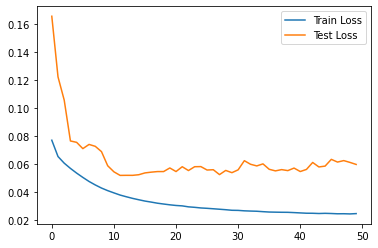

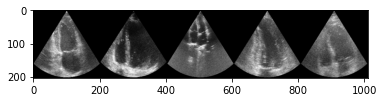

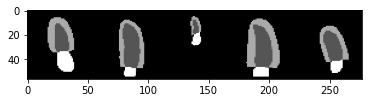

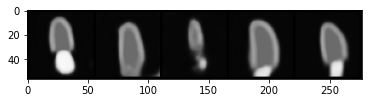


[EPOCH 51/80] | Train loss: 0.0245
[EPOCH 51/80] | Test loss: 0.0585


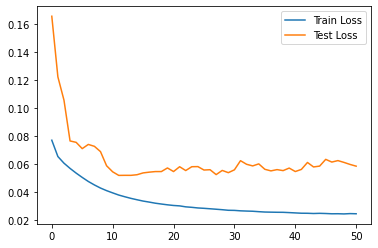


[EPOCH 52/80] | Train loss: 0.0244
[EPOCH 52/80] | Test loss: 0.0583


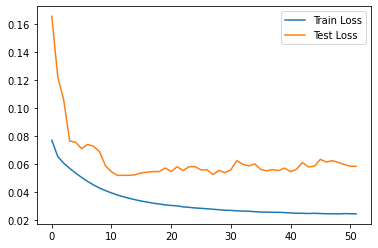


[EPOCH 53/80] | Train loss: 0.0242
[EPOCH 53/80] | Test loss: 0.0605


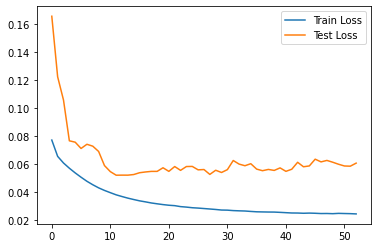


[EPOCH 54/80] | Train loss: 0.0242
[EPOCH 54/80] | Test loss: 0.0623


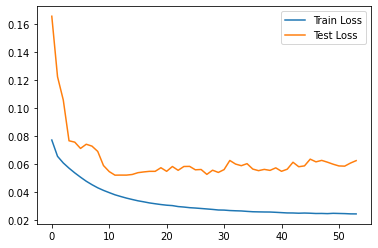


[EPOCH 55/80] | Train loss: 0.0241
[EPOCH 55/80] | Test loss: 0.0638


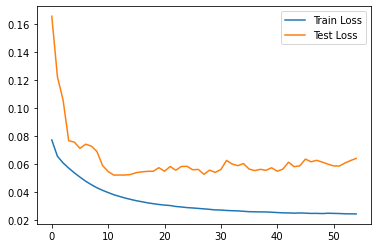


[EPOCH 56/80] | Train loss: 0.0242
[EPOCH 56/80] | Test loss: 0.0625


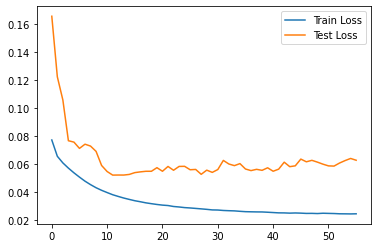


[EPOCH 57/80] | Train loss: 0.0240
[EPOCH 57/80] | Test loss: 0.0593


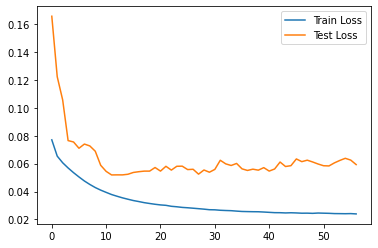


[EPOCH 58/80] | Train loss: 0.0238
[EPOCH 58/80] | Test loss: 0.0567


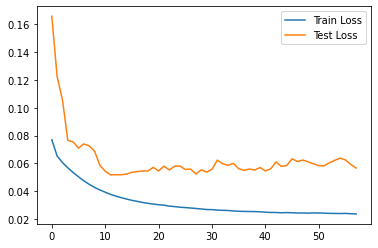


[EPOCH 59/80] | Train loss: 0.0239
[EPOCH 59/80] | Test loss: 0.0629


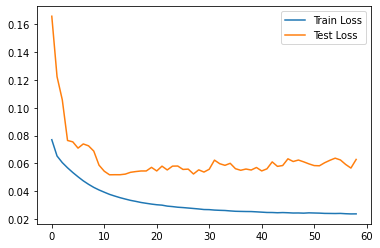


[EPOCH 60/80] | Train loss: 0.0239
[EPOCH 60/80] | Test loss: 0.0605


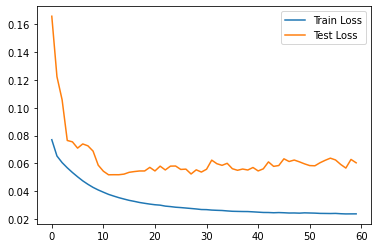

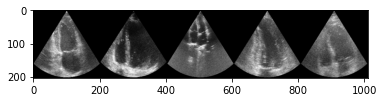

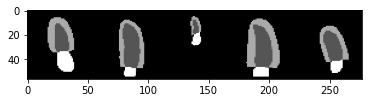

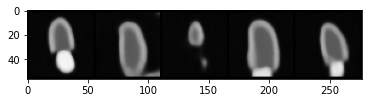


[EPOCH 61/80] | Train loss: 0.0238
[EPOCH 61/80] | Test loss: 0.0550


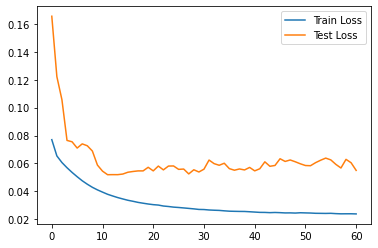


[EPOCH 62/80] | Train loss: 0.0238
[EPOCH 62/80] | Test loss: 0.0604


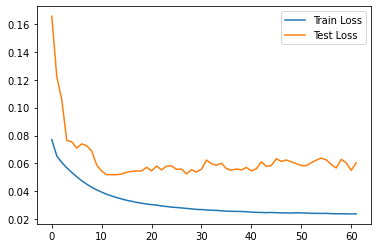


[EPOCH 63/80] | Train loss: 0.0239
[EPOCH 63/80] | Test loss: 0.0592


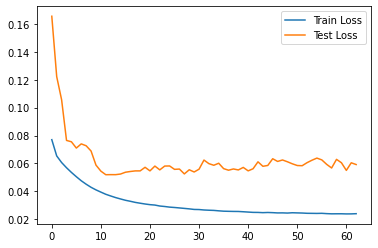


[EPOCH 64/80] | Train loss: 0.0238
[EPOCH 64/80] | Test loss: 0.0640


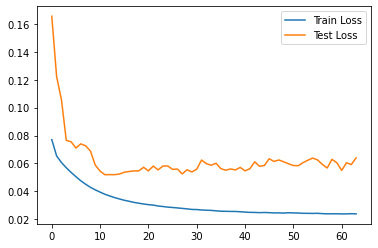


[EPOCH 65/80] | Train loss: 0.0237
[EPOCH 65/80] | Test loss: 0.0644


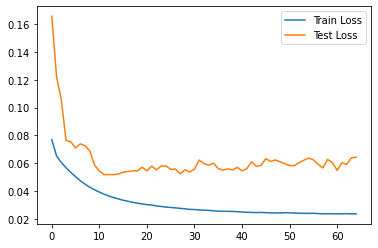


[EPOCH 66/80] | Train loss: 0.0238
[EPOCH 66/80] | Test loss: 0.0651


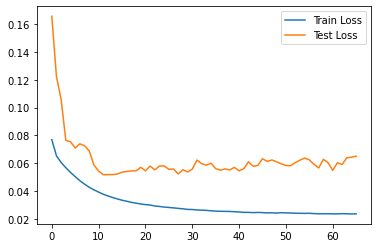


[EPOCH 67/80] | Train loss: 0.0238
[EPOCH 67/80] | Test loss: 0.0633


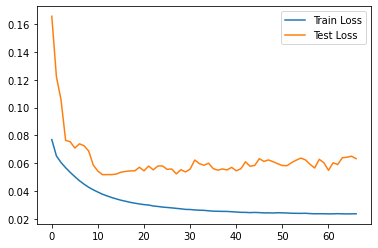


[EPOCH 68/80] | Train loss: 0.0237
[EPOCH 68/80] | Test loss: 0.0576


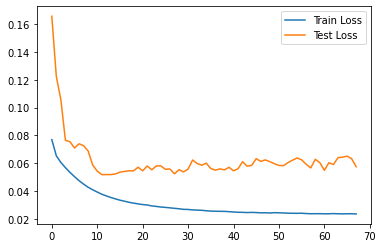


[EPOCH 69/80] | Train loss: 0.0238
[EPOCH 69/80] | Test loss: 0.0657


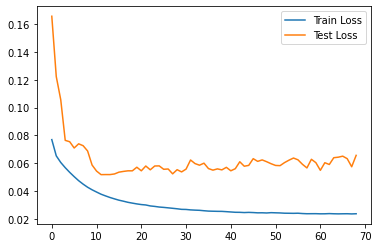


[EPOCH 70/80] | Train loss: 0.0237
[EPOCH 70/80] | Test loss: 0.0598


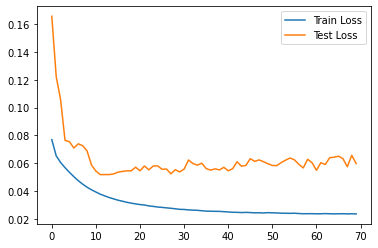

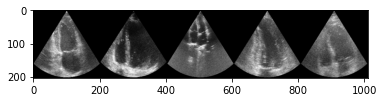

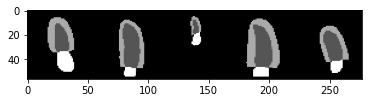

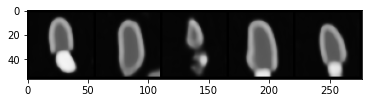


[EPOCH 71/80] | Train loss: 0.0237
[EPOCH 71/80] | Test loss: 0.0586


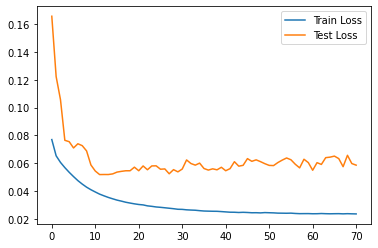


[EPOCH 72/80] | Train loss: 0.0235
[EPOCH 72/80] | Test loss: 0.0609


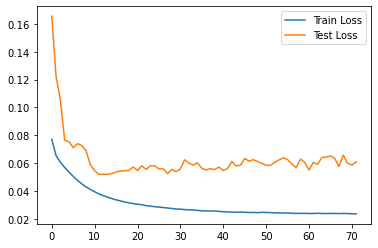


[EPOCH 73/80] | Train loss: 0.0235
[EPOCH 73/80] | Test loss: 0.0618


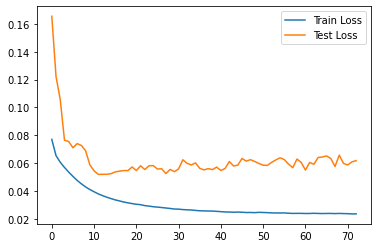


[EPOCH 74/80] | Train loss: 0.0236
[EPOCH 74/80] | Test loss: 0.0596


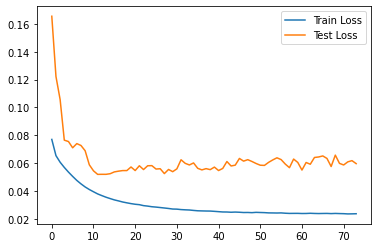


[EPOCH 75/80] | Train loss: 0.0235
[EPOCH 75/80] | Test loss: 0.0563


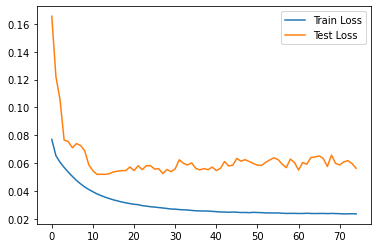


[EPOCH 76/80] | Train loss: 0.0237
[EPOCH 76/80] | Test loss: 0.0555


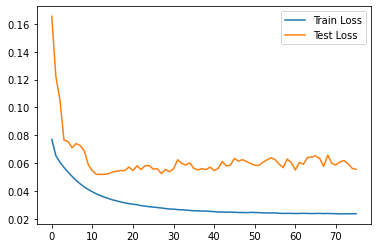


[EPOCH 77/80] | Train loss: 0.0235
[EPOCH 77/80] | Test loss: 0.0582


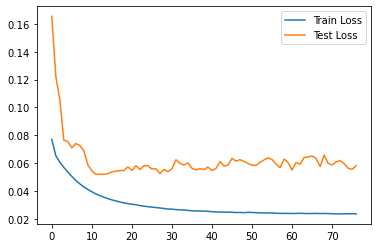


[EPOCH 78/80] | Train loss: 0.0238
[EPOCH 78/80] | Test loss: 0.0489


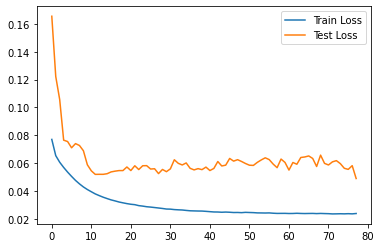


[EPOCH 79/80] | Train loss: 0.0236
[EPOCH 79/80] | Test loss: 0.0502


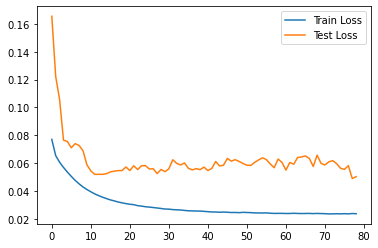

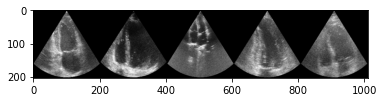

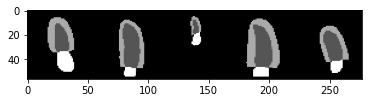

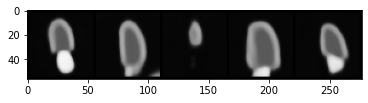


[EPOCH 80/80] | Train loss: 0.0236
[EPOCH 80/80] | Test loss: 0.0493


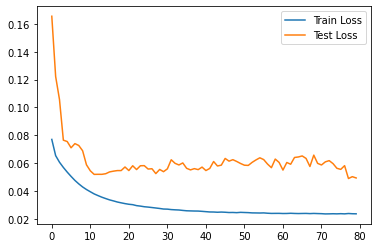

In [15]:
train_loss = []
test_loss = []

unet = UNet(input_dim, label_dim, hidden_channels=16).to(device)
unet_opt = torch.optim.Adam(unet.parameters(), lr=lr, weight_decay=0.02)

for epoch in range(n_epochs):
    running_loss = 0
    for img, mask in tqdm(trainloader):
        img = img.to(device)
        mask = mask.to(device)

        unet_opt.zero_grad()

        pred, _ = unet(img)
        unet_loss = criterion(pred, mask) #+ 0.3 * torch.norm(pred, mask, ord=2)
        running_loss += unet_loss.item() / batch_size
        unet_loss.backward()
        unet_opt.step()

    train_loss += [running_loss / len(trainloader)]

    if epoch % epoch_log_step == 0 or epoch == n_epochs - 1:
        show_tensor_images(img, size=img.shape[1:])
        show_tensor_images(mask, size=mask.shape[1:])
        show_tensor_images(pred, size=pred.shape[1:])
        torch.save({
            "epoch": epoch,
            "opt": unet_opt.state_dict(),
            "unet": unet.state_dict()
        }, f"unet-results/u-net_{epoch}.pth")

    with torch.no_grad():
        unet.eval()
        running_loss = 0
        for img, mask in tqdm(testloader):
            img = img.to(device)
            mask = mask.to(device)

            unet_opt.zero_grad()

            pred, _ = unet(img)
            unet_loss = criterion(pred, mask)
            running_loss += unet_loss.item() / batch_size

        test_loss += [running_loss / len(testloader)]
        print(f"[EPOCH {epoch+1}/{n_epochs}] | Train loss: {train_loss[-1]:.4f}")
        print(f"[EPOCH {epoch+1}/{n_epochs}] | Test loss: {test_loss[-1]:.4f}")
        plt.plot(range(len(train_loss)), train_loss, label="Train Loss")
        plt.plot(range(len(test_loss)), test_loss, label="Test Loss")
        plt.legend(loc="best")
        plt.show()
        unet.train()

            

In [8]:
unet = UNet(input_dim, label_dim).to(device)
unet.load_state_dict(torch.load("unet-results/u-net_199.pth")["unet"])
dl = DataLoader(val_set, batch_size=batch_size, num_workers=0)

with torch.no_grad():
    for img, mask in DataLoader(val_set, batch_size=batch_size, num_workers=0):
        img = img.to(device)
        mask = mask.to(device)

        pred = unet(img)
        show_tensor_images(img, size=img.shape[1:])
        show_tensor_images(mask, size=mask.shape[1:])
        show_tensor_images(pred, size=pred.shape[1:])
    

NameError: name 'val_set' is not defined